In [1]:
# Pima Indian diabetes dataset includes 768 rows and 9 columns. 
# It consists of 8 numeric features, each of which does not have any NAN values, 
# and a target variable (Outcome). There are no duplicated rows in the dataset.
# The database contains 500 records correspond to negative outcomes and 268 to positive.
# In the Outcome column, 1 represents diabetes positive and 0 represents diabetes negative.
# Some features like Glucose, Blood pressure, Insulin, BMI have zero values which represents missing data.

# Dataset has following variables (names of columns):
# Pregnancies - Number of times pregnant
# Glucose - Plasma glucose concentration
# BloodPressure - Diastolic blood pressure (mm Hg)
# SkinThickness - Triceps skin fold thickness (mm)
# Insulin - 2-Hour serum insulin (mu U/ml)
# BMI - Body mass index
# DiabetesPedigreeFunction - Diabetes pedigree function
# Age - Age (years)
# Outcome - Class variable (0 or 1) - (Target variable)


import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, \
accuracy_score, precision_score, recall_score, \
precision_recall_curve, PrecisionRecallDisplay
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# 1. Read the data

data = pd.read_csv('diabetes.csv')
print(data.head())  # top 5 rows
# print(data)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# 2. Explore and visualize the data
# The describe() method was used for preliminary screening to get statistics description
# of the data in the diabetes dataframe. It contains following information for each collumn:
# count – The number of non-empty values.
# mean – The average (mean) value.
# std – The standart deviation.
# min – the minimum value.
# 25% - The 25% percentile*.
# 50% - The 25% percentile*.
# 75% - The 25% percentile*.
# max – The maximum value.
# *Percentile means how many of the values are less than the given percentile.

# The age category of the studied patients ranges from 21 to 81, 
# where 25% had no pregnancies and 50% had less than 3 pregnancies.
# Minimum values for many variables are 0. As biological parameters like Glucose,
# BloodPressure, SkinThickness, Insulin & BMI cannot have zero values, probably null values have been coded as zeros. 

# Number of zero values included in each variable:
# Pregnancies: 111,
# Glucose: 5,
# BloodPressure: 35,
# SkinThickness: 227,
# Insulin: 374,
# BMI: 11,
# DiabetesPedi-greeFunction: 0,
# Age: 0.


print(data.shape)  # Number of rows and coloumns

data = data.dropna(how="any", axis=0)

print(data.isna()) #check missing values

print(data.isnull().sum())  # check null (missing) values

print(data.info)  # Information of all the columns

print(data.describe())  # Statistics of the data

print("\n", data.nunique())  # Checking unique values

print("\n", data[data.duplicated()]) #check duplicates



(768, 9)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    Fa

In [3]:
#Counting cells with 0 Values in each variable
(data.Pregnancies == 0).sum(),(data.Glucose==0).sum(), (data.BloodPressure==0).sum(),(data.SkinThickness==0).sum(), (data.Insulin==0).sum(),(data.BMI==0).sum(),(data.DiabetesPedigreeFunction==0).sum(),(data.Age==0).sum()


(111, 5, 35, 227, 374, 11, 0, 0)

Text(0.5, 1.0, 'Pair plot graph for the diabetes dataset ')

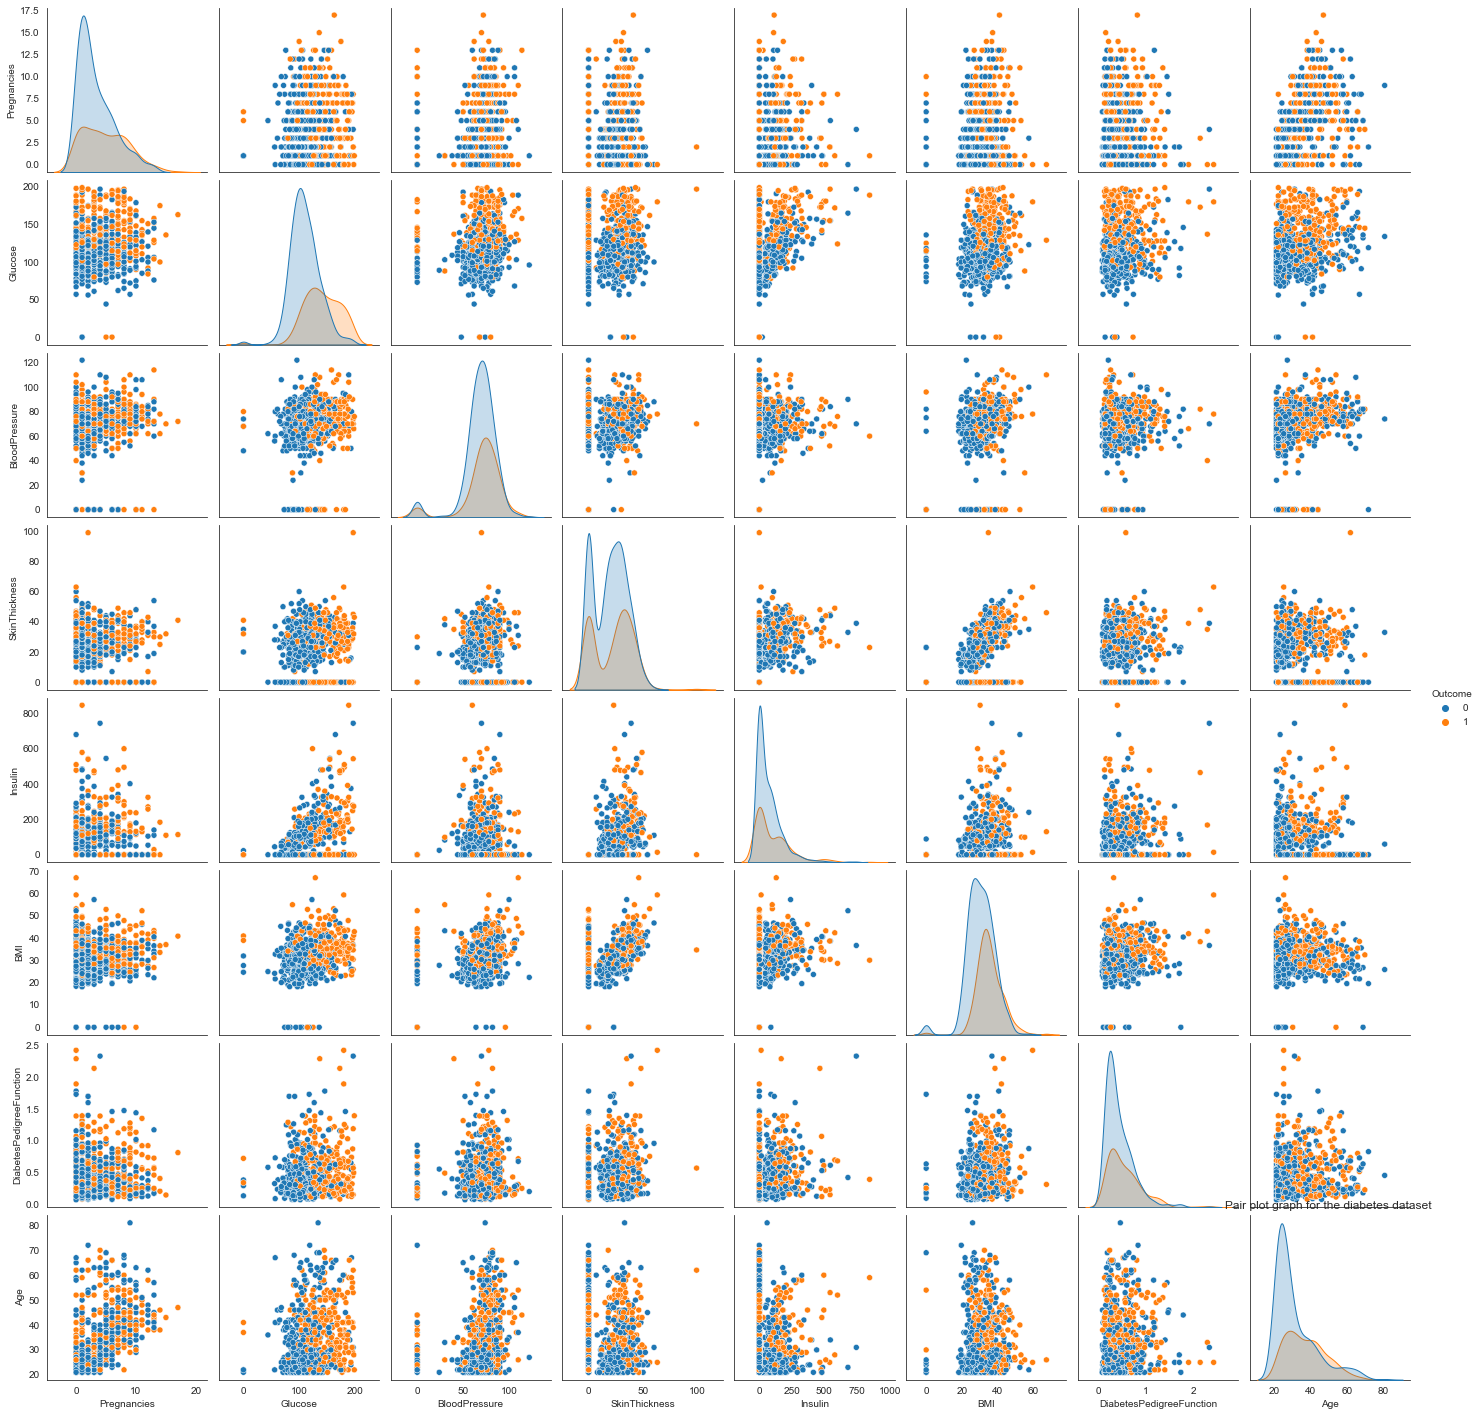

In [4]:
# Pair plot
# Where Outcome: 1 – red color (diabetes positive) and 0 – blue color (diabetes negative).

# The pair plot shows that  BMI & SkinThickness and Pregnancies & Age seem to have positive linear relationships.
# Another likely suspect is Glucose and Insulin. There are no non-linear relationships.

sns.set_style(style='white')
sns.pairplot(data, hue='Outcome')
# displaying the title
plt.title("Pair plot graph for the diabetes dataset ")
# plt.show()


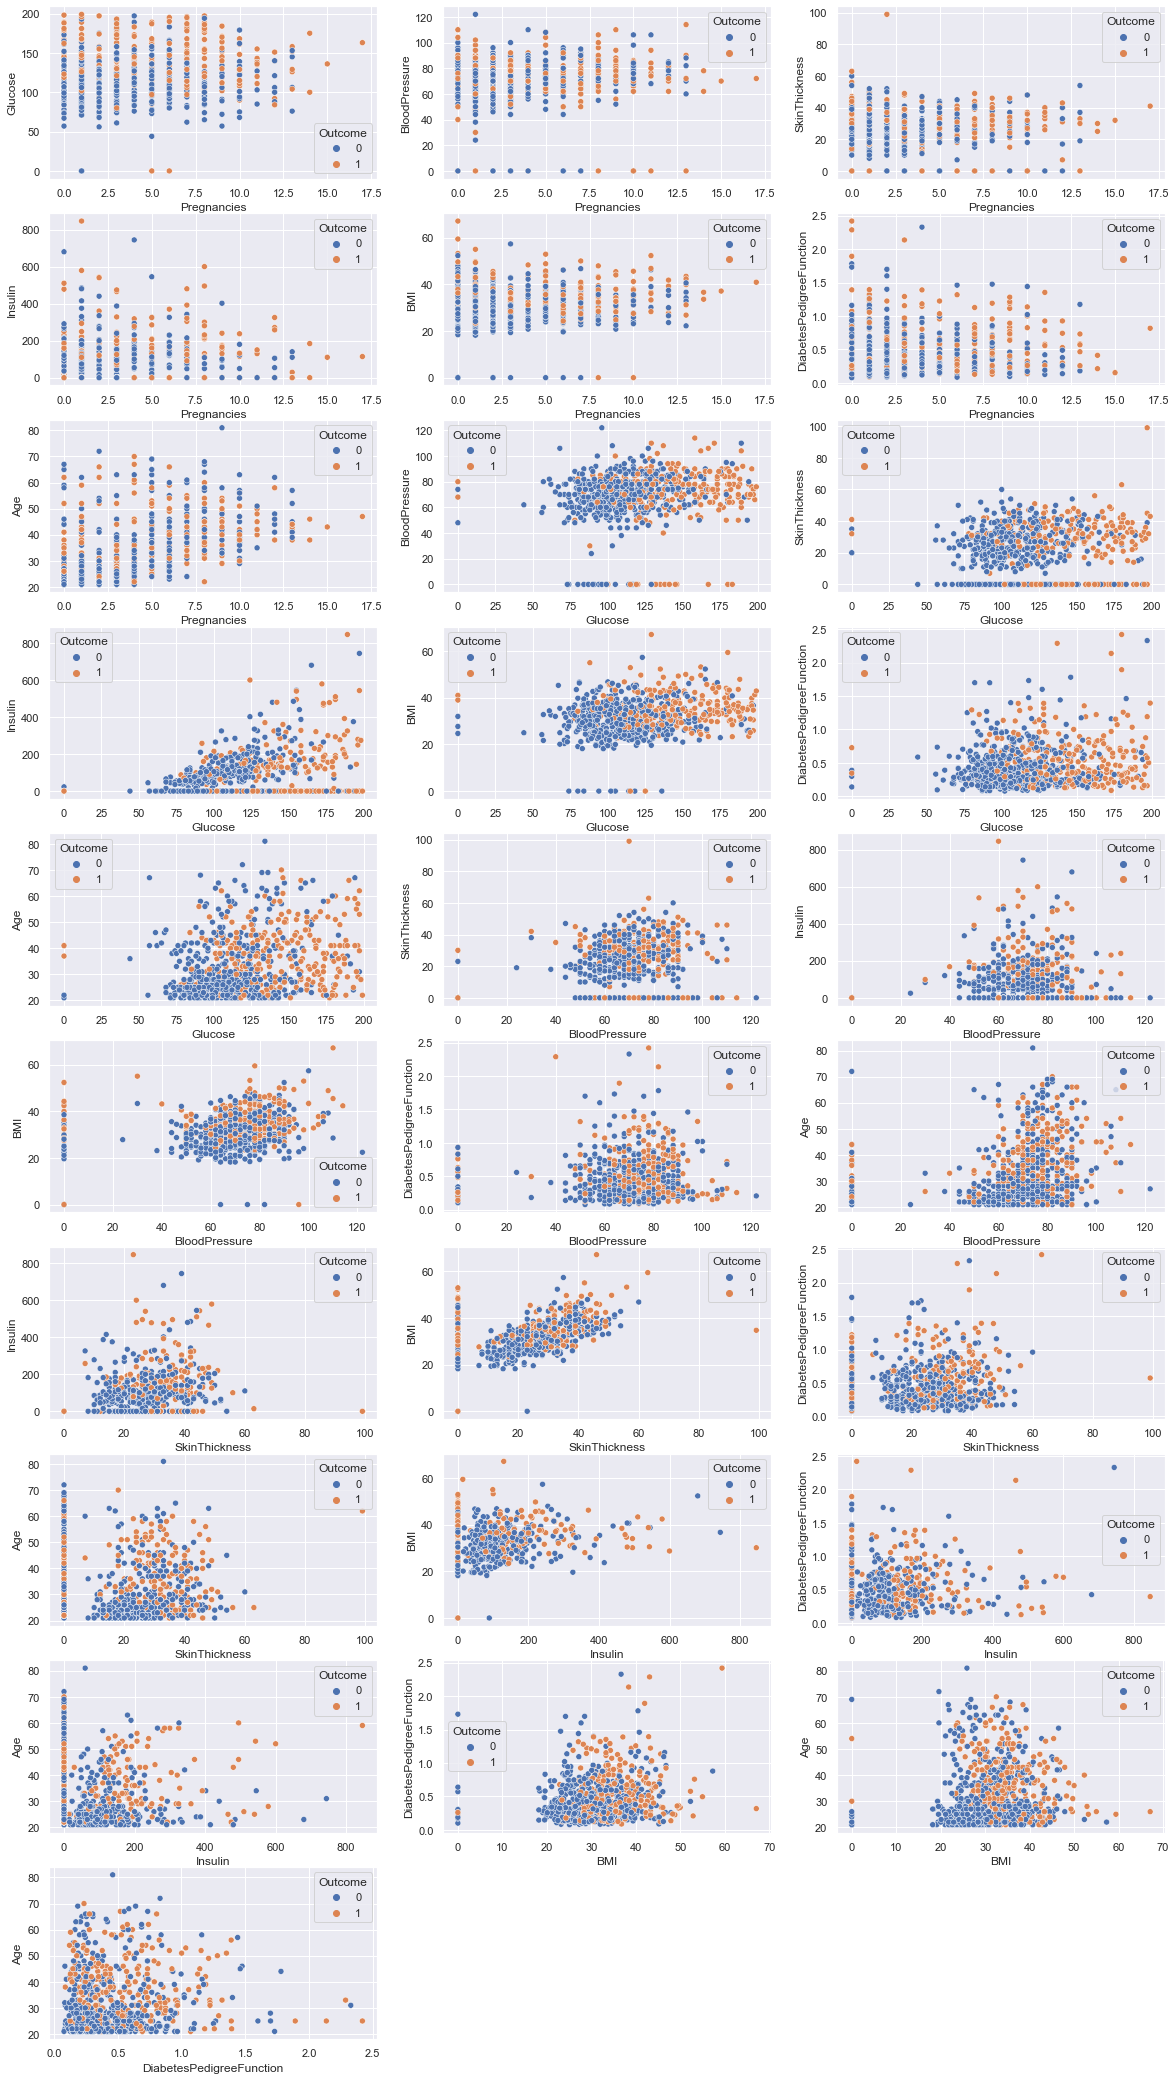

In [5]:

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
           'Age']
colours = ['c', 'darkblue', 'g', 'r', 'k', 'm', 'gold', 'b']

# scatter plot
sns.set(rc={'figure.figsize': (20, 45)})
k = 1
for i in range(len(columns)):
    for j in range(i, len(columns)):
        if i == j:
            continue
        plt.subplot(12, 3, k)
        sns.scatterplot(x=data[columns[i]], y=data[columns[j]], hue="Outcome", data=data)
        k = k + 1
plt.show()


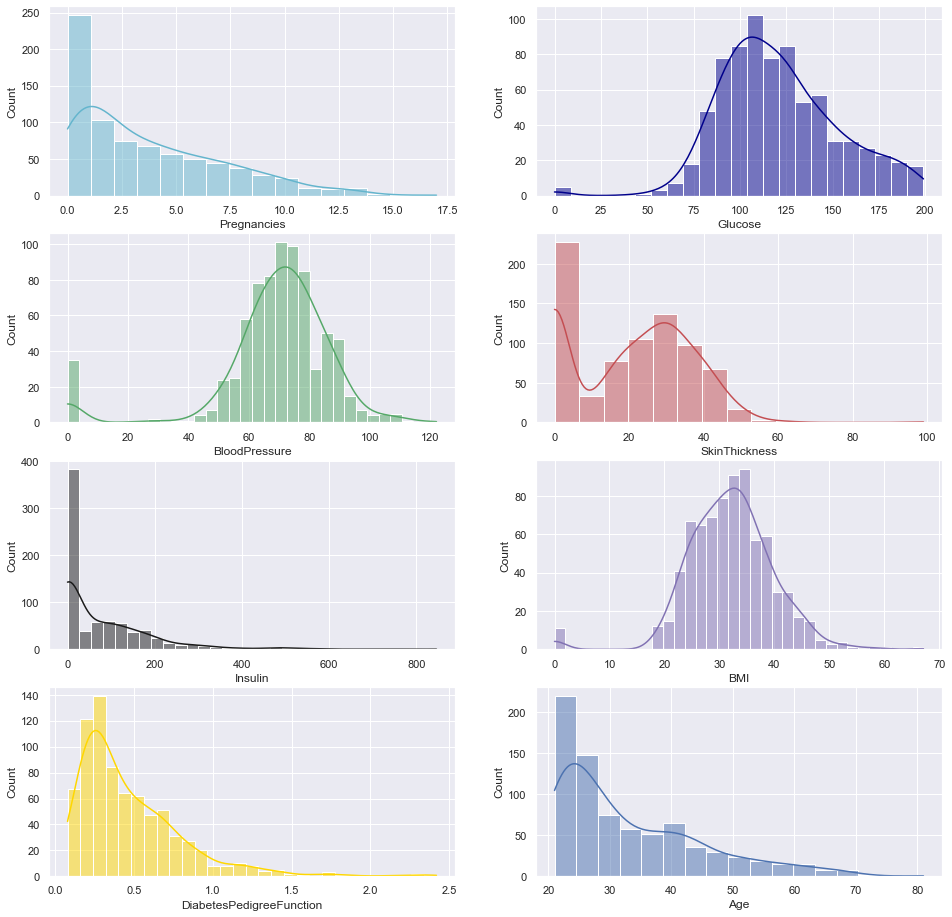

In [6]:
# histplot
sns.set(rc={'figure.figsize': (16, 16)})
for i in range(len(columns)):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data[columns[i]], kde=True, color=colours[i])
plt.show()


# The hist plot shows that none of the graphs follow a normal distribution.
# Majority of histogram graphs visually look to have data are right skewed.
# Histogram for Pregnancies has a large proportion of the participants with zero count on pregnancy.
# Histogram of Glucose graph in the range of values from 50 to 200 has slightly skewed data to right as well.
# One hour after glucose administration the insulin normal level  ranges between 18 and 276 mlU/L, hence there are
# some outliers in the data and most of them with higher insulin values. 
# Histogram of BloodPressure in the range from 40 to 100 is closest to what a normal distribution should look like.
# The BMI histogram shows outliers as well, that means that most of participants are obese and hence have a high risk
# of diabetes. Expected range of normal BMI is between 18 to 25 kg/m^3.


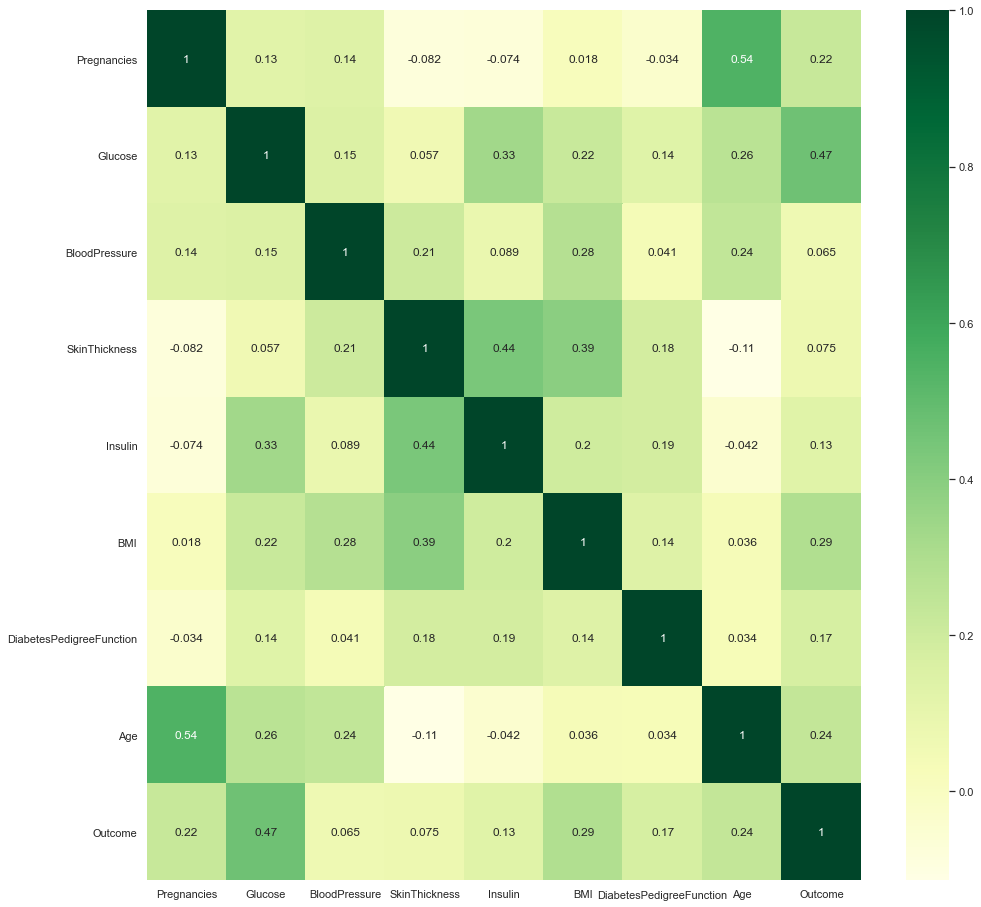

In [7]:
# heatmap
sns.set(rc={'figure.figsize': (16, 16)})
sns.heatmap(data.corr(), cmap='YlGn', annot=True)
plt.show()

# The correlation heatmap demonstrates that there is a high correlation between Outcome and [Glucose, BMI, Age, Insulin].
# Thus, these features can be selected to accept input from the user and predict the outcome.


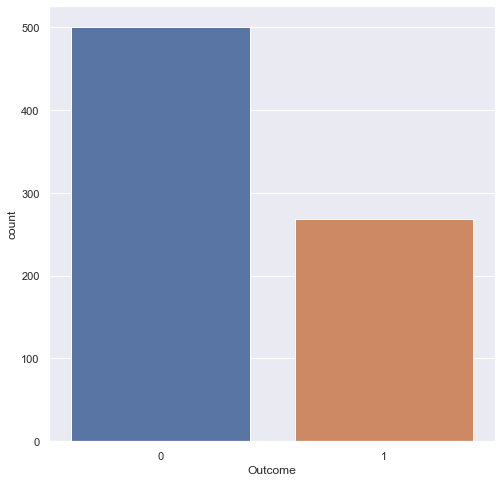

In [8]:
# countplot
sns.set(rc={'figure.figsize': (8, 8)})
sns.countplot(x=data['Outcome'], data=data)
plt.show()

# The countplot tells us that the dataset is imbalanced, as the number of patients who don’t have diabetes
# is more than those who do.


In [9]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
# 3. Preprocess the data
# Due to the large number of zeros contained in the variables (such as Insulin, SkinThickness),
# the database was cleaned up by replacing missing values with mean values for 5 variables except 
# Pregnancies and Outcome, a new database was created and used for the further analysis.

# Replacing zero values with NaN
data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", 
      "BMI"]] = data[["Glucose", "BloodPressure", "SkinThickness",
                      "Insulin", "BMI"]].replace(0, np.NaN)

# Count of NaN
print(data.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
# Replacing NaN with mean values
data["Glucose"].fillna(data["Glucose"].mean(), inplace = True)
data["BloodPressure"].fillna(data["BloodPressure"].mean(), inplace = True)
data["SkinThickness"].fillna(data["SkinThickness"].mean(), inplace = True)
data["Insulin"].fillna(data["Insulin"].mean(), inplace = True)
data["BMI"].fillna(data["BMI"].mean(), inplace = True)

print(data.describe())

# Feature scaling is about transforming the value of features in the similar range like others
# for machine learning algorithms to behave better resulting in optimal models.Normalization is
# about transforming the feature values to fall within the bounded intervals (min and max). 
# MinMaxScaler class of sklearn.preprocessing was used for normalization of features.

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

In [12]:
# data normalization
# retrieve just the numeric input values
dataset = data.values[:, :-1]

# perform a robust scaler transform of the dataset
minMax_scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = minMax_scaler.fit_transform(dataset)

# convert the array to a dataframe
data_scaled = pd.DataFrame(data_scaled, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                                 'BMI', 'DiabetesPedigreeFunction', 'Age'])
data_scaled['Outcome'] = data['Outcome']

# summarize
print(data_scaled.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.501205       0.493930       0.240798    0.170130   
std       0.198210    0.196361       0.123432       0.095554    0.102189   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.359677       0.408163       0.195652    0.129207   
50%       0.176471    0.470968       0.491863       0.240798    0.170130   
75%       0.352941    0.620968       0.571429       0.271739    0.170130   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.291564                  0.168179    0.204015    0.348958  
std      0.140596                  0.141473    0.196004    0.476951  
min      0.000000                  

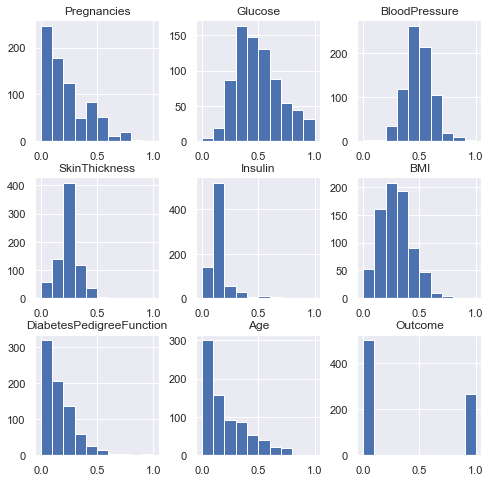

In [13]:
# histograms of the variables
data_scaled.hist()
plt.show()

# Histogram of the scaled data shows a rescaling of the data from the original range so that all values
# are within the new range of 0 and 1. 

In [14]:
# train and test dataset
# Selecting features - [['Glucose', 'Insulin', 'BMI', 'Age']]
x_train, x_test, y_train, y_test = train_test_split(data_scaled[['Glucose', 'Insulin', 'BMI', 'Age']], data_scaled['Outcome'], test_size=0.2, random_state=42)
print(len(x_train+y_train))
print(len(x_test+y_test))

# In the feature correlation heatmap, it was observed that Glucose, Insulin, Age and BMI
# are highly correlated with the Outcome. Thus,  these features of the scaled dataset were
# selected and then  the dataset was splited into train and test datasets with 20% of the data for testing.

614
154



F1 score: 0.627450980392157


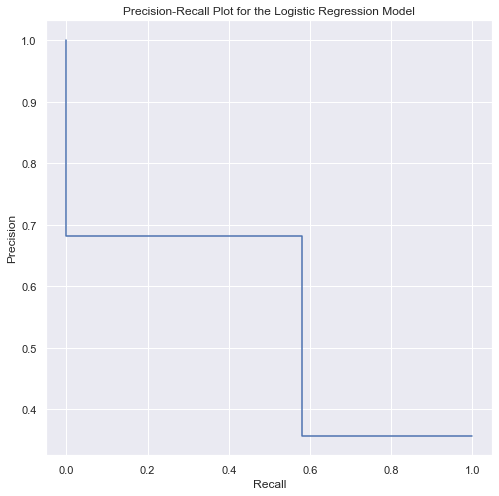

Confusion Matrix : 
 [[84 15]
 [23 32]]
The accuracy of Logistic Regression is :  75.32467532467533 %
Precision score for Logistic Regression is : 68.08510638297872 %
Recall score for Logistic Regression is : 58.18181818181818 %


In [15]:
# 4.Apply machine learning methods
# predict and evaluate models


# Several machine learning methods such as Logistic regression, Support Vector machine,
# KNearestNeighbors, Decision tree Classifier, Random Forest Classifier, XGB Classifier,
# Gaussian NB, K-Means were applied to solve a binary classification problem, few classification metrics,
# confusion matrix, presicion_recall curve were used to evaluate and compare models to find the best one
# to predict diabetes disease.

# First, models were trained with the training dataset, then tested on testing dataset. 
# Once the model’s predictions were obtained from the x_test data, then it were compared 
# to the true y_values (the correct labels). After that, for greater accuracy the F1 score
# was estimated and precision-recall curve was plotted.

# Logistic regression model
log_model = LogisticRegression()

log_model.fit(x_train, y_train)    # fit the model to train data set

predicted_log = log_model.predict(x_test) # predict the model

log_acc = accuracy_score(y_test, predicted_log)
log_prec = precision_score(y_test, predicted_log)
log_recall = recall_score(y_test, predicted_log)

log_f1 = 2 * (log_prec * log_recall) / (log_prec + log_recall)
print("\nF1 score:", log_f1)

# precision_recall_curve computes precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, predicted_log)

# precision-recall visualization of logistic regression model
# The Precision – Recall curve shows the tradeoff between precision and recall for different threshold.
# A high area under the curve represents both high recall and high precision, high scores for both metrics
# show that the classifier is returning accurate results (high precision) and a mojority of all positive 
# results (high recall).

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Plot for the Logistic Regression Model")
plt.show()

cm_log = confusion_matrix(y_test, predicted_log)
print("Confusion Matrix : \n", cm_log)
print("The accuracy of Logistic Regression is : ", log_acc*100, "%")
print("Precision score for Logistic Regression is :", log_prec*100, "%")
print("Recall score for Logistic Regression is :", log_recall*100, "%")

# Confusion matrix shows that True Positive values are 32, and True Negative: 84, where True Positive
# means that observations are positive and predicted to be positive, and True Negative means that observations
# are negative and predicted as negative. 32 patients indicated as having diabetes and 84 are healthy. 
# Logistic Regression model estimated values with accuracy 75 %, but at the same time recall score shows that
# the model is detecting positive events with 58 % accuracy, and assign positive events to the positive class
# with accuracy 68%. The F1 score value for the model is 0.627450980392157.


F1 score: 0.6213592233009707


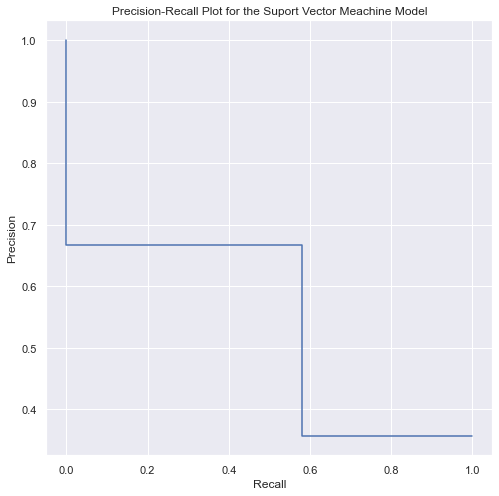

Confusion Matrix : 
 [[83 16]
 [23 32]]
The accuracy of Suport Vector Meachine is :  74.67532467532467 %
Precision score for Suport Vector Meachine is : 66.66666666666666 %
Recall score for Suport Vector Meachine is : 58.18181818181818 %


In [16]:
# Support Vector Machine model
svm_model = SVC()

svm_model.fit(x_train, y_train)

predicted_svm = svm_model.predict(x_test)

svm_acc = accuracy_score(y_test, predicted_svm)
svm_prec = precision_score(y_test, predicted_svm)
svm_recall = recall_score(y_test, predicted_svm)

svm_f1 = 2 * (svm_prec * svm_recall) / (svm_prec + svm_recall)
print("\nF1 score:", svm_f1)

# computes precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, predicted_svm)

# precision - recall visualization of SVM model
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Plot for the Suport Vector Meachine Model")
plt.show()

cm_svm = confusion_matrix(y_test, predicted_svm)
print("Confusion Matrix : \n", cm_svm)
print("The accuracy of Suport Vector Meachine is : ", svm_acc*100, "%")
print("Precision score for Suport Vector Meachine is :", svm_prec*100, "%")
print("Recall score for Suport Vector Meachine is :", svm_recall*100, "%")

# Confusion matrix for SVM model shows that True Positive values are 32, and True Negative: 83,
# where True Positive means that observations are positive and predicted to be positive, and 
# True Negative means that observations are negative and predicted as negative. 32 patients indicated
# as having diabetes and 83 are healthy. Suport Vector Meachine Model estimated values with accuracy 75 %,
# but at the same time recall score shows that the model is detecting positive events with 58 % accuracy, 
# and assign positive events to the positive class (presision) with accuracy 67%. The F1 score value for the
# model is  0.6213592233009707.


F1 score: 0.6086956521739131


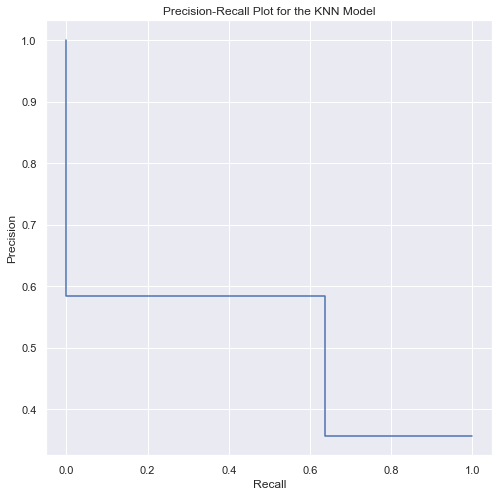

Confusion Matrix : 
 [[74 25]
 [20 35]]
The accuracy of KNN is :  70.77922077922078 %
Precision score for KNN is : 58.333333333333336 %
Recall score for KNN is : 63.63636363636363 %


In [17]:
# KNearest Neighbour model
knn_model = KNeighborsClassifier(n_neighbors=9)

knn_model.fit(x_train, y_train)

predicted_knn = knn_model.predict(x_test)

knn_acc = accuracy_score(y_test, predicted_knn)
knn_prec = precision_score(y_test, predicted_knn)
knn_recall = recall_score(y_test, predicted_knn)

knn_f1 = 2 * (knn_prec * knn_recall) / (knn_prec + knn_recall)
print("\nF1 score:", knn_f1)

# computes precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, predicted_knn)

# precision - recall visualization of KNN model
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Plot for the KNN Model")
plt.show()

cm_knn = confusion_matrix(y_test, predicted_knn)
print("Confusion Matrix : \n", cm_knn)
print("The accuracy of KNN is : ", knn_acc*100, "%")
print("Precision score for KNN is :", knn_prec*100, "%")
print("Recall score for KNN is :", knn_recall*100, "%")


# Confusion matrix for KNN model shows that True Positive values are 35, and True Negative: 74,
# where True Positive means that observations are positive and predicted to be positive, and 
# True Negative means that observations are negative and predicted as negative. For instance, 
# 35 patients indicated as having diabetes and 74 are healthy. KNN Model estimated values with
# accuracy 71 %, but at the same time recall score shows that the model is detecting positive
# events with 58 % accuracy, and assign positive events to the positive class (presision) with
# accuracy 64%. The F1 score value for the model is  0.6086956521739131.


F1 score: 0.6717557251908397


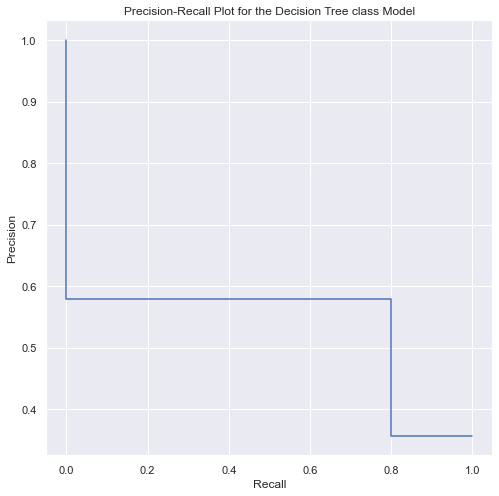

Confusion Matrix : 
 [[67 32]
 [11 44]]
The accuracy of Decision Tree class is :  72.07792207792207 %
Precision score for Decision Tree class is : 57.89473684210527 %
Recall score for Decision Tree class is : 80.0 %


In [18]:
# Decision Tree class model
dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

dtc_model.fit(x_train, y_train)

predicted_dtc = dtc_model.predict(x_test)

dtc_acc = accuracy_score(y_test, predicted_dtc)
dtc_prec = precision_score(y_test, predicted_dtc)
dtc_recall = recall_score(y_test, predicted_dtc)

dtc_f1 = 2 * (dtc_prec * dtc_recall) / (dtc_prec + dtc_recall)
print("\nF1 score:", dtc_f1)

# computes precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, predicted_dtc)

# precision - recall visualization of DecisionTreeClassifier model
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Plot for the Decision Tree class Model")
plt.show()

cm_dtc = confusion_matrix(y_test, predicted_dtc)
print("Confusion Matrix : \n", cm_dtc)
print("The accuracy of Decision Tree class is : ", dtc_acc*100, "%")
print("Precision score for Decision Tree class is :", dtc_prec*100, "%")
print("Recall score for Decision Tree class is :", dtc_recall*100, "%")


# Confusion matrix for Decision Tree Classiffier model shows that True Positive values are 44,
# and True Negative: 67, where True Positive means that observations are positive and predicted to be positive,
# and True Negative means that observations are negative and predicted as negative. Thus, 44 patients indicated
# as having diabetes and 67 are healthy. Decision Tree Classiffier Model estimated values with accuracy 72 %, 
# but at the same time recall score shows that the model is detecting positive events with 80 % accuracy, and
# assign positive events to the positive class (presision) with accuracy 58%. The F1 score value for the model
# is  0.6717557251908397.

[18:26:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

F1 score: 0.6554621848739497


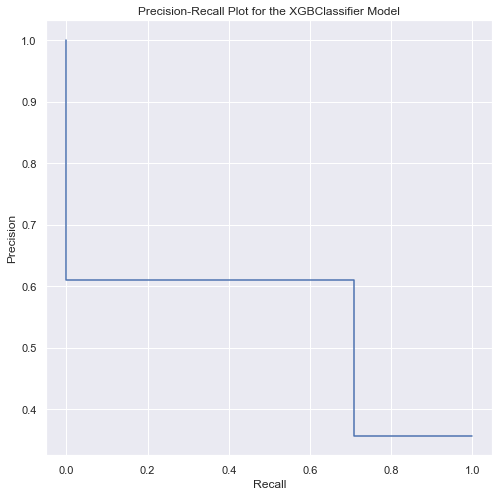

Confusion Matrix : 
 [[74 25]
 [16 39]]
The accuracy of X Gradient Boosting is:  73.37662337662337 %
Precision score for X Gradient Boosting is : 60.9375 %
Recall score for X Gradient Boosting is : 70.9090909090909 %


In [19]:
# X Gradient Boosting model
xgb_model = XGBClassifier(booster='gbtree', use_label_encoder=False, learning_rate=0.1, max_depth=6, n_estimators=10)

xgb_model.fit(x_train, y_train) # fit the model to the train data set

predicted_xgb = xgb_model.predict(x_test) # predict the model

# evaluate the model
xgb_acc = accuracy_score(y_test, predicted_xgb)
xgb_prec = precision_score(y_test, predicted_xgb)
xgb_recall = recall_score(y_test, predicted_xgb)

xgb_f1 = 2 * (xgb_prec * xgb_recall) / (xgb_prec + xgb_recall)
print("\nF1 score:", xgb_f1)

# computes precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, predicted_xgb)

# precision - recall visualization of XGBClassifier model
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Plot for the XGBClassifier Model")
plt.show()

cm_xgb = confusion_matrix(y_test, predicted_xgb)
print("Confusion Matrix : \n", cm_xgb)
print("The accuracy of X Gradient Boosting is: ", xgb_acc*100, "%")
print("Precision score for X Gradient Boosting is :", xgb_prec*100, "%")
print("Recall score for X Gradient Boosting is :", xgb_recall*100, "%")


# Confusion matrix for XGBClassifier model shows that True Positive values are 39,
# and True Negative: 74, where True Positive means that observations are positive 
# and predicted to be positive, and True Negative means that observations are negative 
# and predicted as negative. Thus, 39 patients indicated as having diabetes and 74 are healthy.
# XGBClassifier Model estimated values with accuracy 73 %, but at the same time recall score shows
# that the model is detecting positive events with 71 % accuracy, and assign positive events to the
# positive class (presision) with accuracy 61%. The F1 score value for the model is  0.6554621848739497.


F1 score: 0.6605504587155963


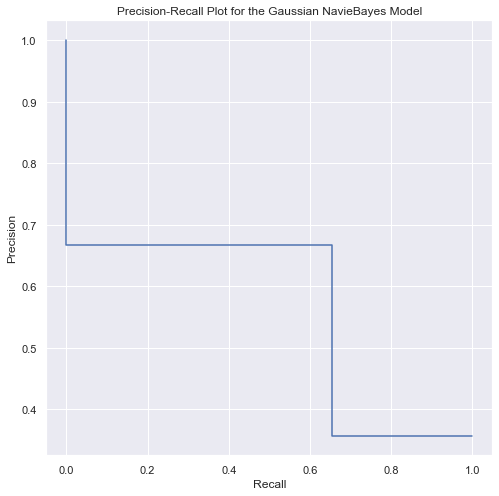

Confusion Matrix : 
 [[81 18]
 [19 36]]
The accuracy of Gaussian Naive Bayes is :  75.97402597402598 %
Precision score for Gaussian Naive Bayes is : 66.66666666666666 %
Recall score for Gaussian Naive Bayes is : 65.45454545454545 %


In [21]:
# Gaussian NavieBayes model
gnb_model = GaussianNB()

gnb_model.fit(x_train, y_train)

predicted_gnb = gnb_model.predict(x_test)

gnb_acc = accuracy_score(y_test, predicted_gnb)
gnb_prec = precision_score(y_test, predicted_gnb)
gnb_recall = recall_score(y_test, predicted_gnb)

gnb_f1 = 2 * (gnb_prec * gnb_recall) / (gnb_prec + gnb_recall)
print("\nF1 score:", gnb_f1)

# computes precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, predicted_gnb)

# precision - recall visualization of GaussianNB model
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Plot for the Gaussian NavieBayes Model")
plt.show()

cm_gnb = confusion_matrix(y_test, predicted_gnb)
print("Confusion Matrix : \n", cm_gnb)
print("The accuracy of Gaussian Naive Bayes is : ", gnb_acc * 100, "%")
print("Precision score for Gaussian Naive Bayes is :", gnb_prec * 100, "%")
print("Recall score for Gaussian Naive Bayes is :", gnb_recall * 100, "%")

# Confusion matrix for Gaussian NavieBayes model shows that True Positive values are 36,
# and True Negative: 81, where True Positive means that observations are positive and predicted
# to be positive, and True Negative means that observations are negative and predicted as negative.
# Thus, 36 patients indicated as having diabetes and 81 are healthy. Gaussian NavieBayes Model estimated
# values with accuracy 76 %, but at the same time recall score shows that the model is detecting positive
# events with 67 % accuracy, and assign positive events to the positive class (presision) with accuracy 65%.
# The F1 score value for the model is  0.6605504587155963.



F1 score: 0.6722689075630253


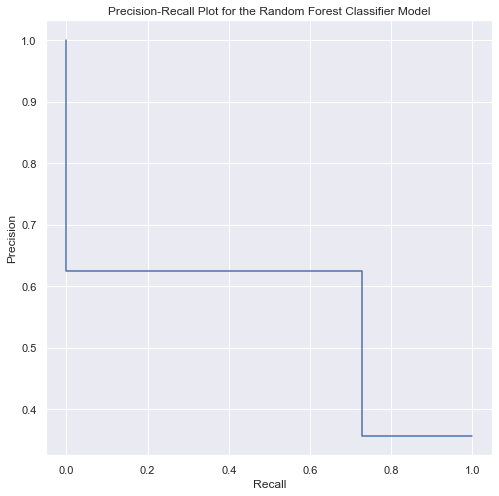

Confusion Matrix : 
 [[75 24]
 [15 40]]
The accuracy of Random Forest Classifier is :  74.67532467532467 %
Precision score for Random Forest Classifier is : 62.5 %
Recall score for Random Forest Classifier is : 72.72727272727273 %


In [22]:
# Random Forest Classifier model
# A forest consists of a large number of trees. Similarly, a random forest involves processing many decision trees.
# Each tree predicts a value for the probability of target variables.

# Some advantages of the model: it allows estimating the significance of input variables in classification and
# it is more accurate then decision tree.

rfc_model = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_model.fit(x_train, y_train)

predicted_rfc = rfc_model.predict(x_test)

rfc_acc = accuracy_score(y_test, predicted_rfc)
rfc_prec = precision_score(y_test, predicted_rfc)
rfc_recall = recall_score(y_test, predicted_rfc)

rfc_f1 = 2 * (rfc_prec * rfc_recall) / (rfc_prec + rfc_recall)
print("\nF1 score:", rfc_f1)

# computes precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, predicted_rfc)

# precision - recall visualization of the Random Forest Classifier model
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Plot for the Random Forest Classifier Model")
plt.show()

cm_rfc = confusion_matrix(y_test, predicted_rfc)
print("Confusion Matrix : \n", cm_rfc)
print("The accuracy of Random Forest Classifier is : ", rfc_acc * 100, "%")
print("Precision score for Random Forest Classifier is :", rfc_prec * 100, "%")
print("Recall score for Random Forest Classifier is :", rfc_recall * 100, "%")

# Confusion matrix for Random Forest Classifier model shows that True Positive values are 40,
# and True Negative: 75, where True Positive means that observations are positive and predicted 
# to be positive, and True Negative means that observations are negative and predicted as negative.
# Thus, 40 patients indicated as having diabetes and 75 are healthy. Random Forest Classifier Model
# estimated values with accuracy 75 %, but at the same time recall score shows that the model is detecting
# positive events with 63 % accuracy, and assign positive events to the positive class (presision) with accuracy 73%. 
# The F1 score value for the model is  0.6722689075630253.



F1 score: 0.6050420168067226
The accuracy of K-Means is :  69.48051948051948 %
Precision score for K-Means is on test set: 56.25 %
Recall score for K-Means on test set is : 65.45454545454545 %

Confusion Matrix :
  [[71 28]
 [19 36]]


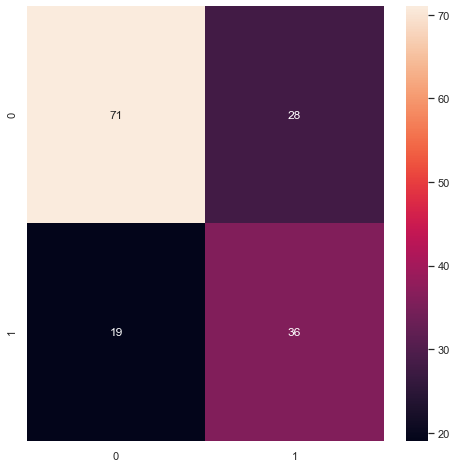

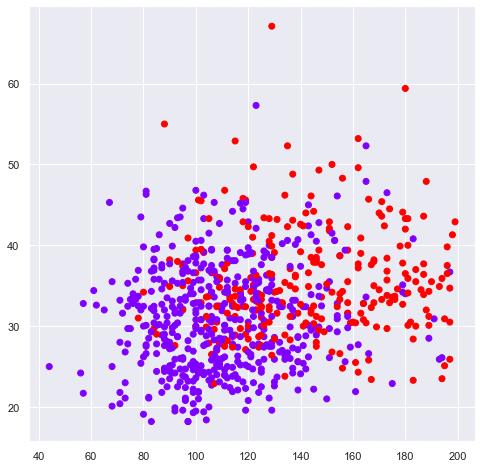

In [24]:
# K-Means clustering model
kmeans_model = KMeans(n_clusters=2, random_state=0)
kmeans_model.fit(x_train)

# prediction using kmeans and accuracy
predicted_kmeans = kmeans_model.predict(x_test)

cluster_acc = accuracy_score(y_test, predicted_kmeans)
cluster_prec = precision_score(y_test, predicted_kmeans)
cluster_recall = recall_score(y_test, predicted_kmeans)

cluster_f1 = 2 * (cluster_prec * cluster_recall) / (cluster_prec + cluster_recall)
print("\nF1 score:", cluster_f1)

print("The accuracy of K-Means is : ", cluster_acc * 100, "%")
print("Precision score for K-Means is on test set:", cluster_prec * 100, "%")
print("Recall score for K-Means on test set is :", cluster_recall * 100, "%")

# confusion matrix
cm_kmeans = confusion_matrix(y_test, predicted_kmeans)
print("\nConfusion Matrix :\n ", cm_kmeans)
outcome_labels = sorted(data.Outcome.unique())
sns.heatmap(
    cm_kmeans,
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)
plt.show()

# plotting Cluster using K-Means
kmeans_model.fit(data_scaled)
plt.scatter(data["Glucose"].values, data["BMI"].values, c=kmeans_model.labels_, cmap='rainbow')
plt.show()


In [26]:
# 5.Explore and visualize the results

models = pd.DataFrame({
    'Model': ['Logistic regression', 'SVC', 'KNN',  'Decision Tree Classifier',
              'XGB Classifier', 'Gaussian NB', 'Random Forest Classifier',    'K-Means'],
    'Accuracy Score': [log_acc, svm_acc, knn_acc, dtc_acc, xgb_acc, gnb_acc, rfc_acc, cluster_acc],
    'Precision Score': [log_prec, svm_prec, knn_prec, dtc_prec, xgb_prec, gnb_prec, rfc_prec, cluster_prec],
    'Recall Score': [log_recall, svm_recall, knn_recall, dtc_recall, xgb_recall, gnb_recall, rfc_recall,
                     cluster_recall],
    'F1 Score': [log_f1, svm_f1, knn_f1, dtc_f1, xgb_f1, gnb_f1, rfc_f1, cluster_f1]
})

print(models.sort_values(by='Accuracy Score', ascending=False))

# Based on the accuracy and F1 scores the plot for model evaluation and comparrison was created. 
# Taking into account all metrics, Random Forest Classifier seems as the best model to predict a disease
# as well as Gaussian NB, both have high values of F1 and accuracy.

                      Model  Accuracy Score  Precision Score  Recall Score  \
5               Gaussian NB        0.759740         0.666667      0.654545   
0       Logistic regression        0.753247         0.680851      0.581818   
1                       SVC        0.746753         0.666667      0.581818   
6  Random Forest Classifier        0.746753         0.625000      0.727273   
4            XGB Classifier        0.733766         0.609375      0.709091   
3  Decision Tree Classifier        0.720779         0.578947      0.800000   
2                       KNN        0.707792         0.583333      0.636364   
7                   K-Means        0.694805         0.562500      0.654545   

   F1 Score  
5  0.660550  
0  0.627451  
1  0.621359  
6  0.672269  
4  0.655462  
3  0.671756  
2  0.608696  
7  0.605042  


In [27]:
print(models.sort_values(by='Precision Score', ascending=False))


                      Model  Accuracy Score  Precision Score  Recall Score  \
0       Logistic regression        0.753247         0.680851      0.581818   
1                       SVC        0.746753         0.666667      0.581818   
5               Gaussian NB        0.759740         0.666667      0.654545   
6  Random Forest Classifier        0.746753         0.625000      0.727273   
4            XGB Classifier        0.733766         0.609375      0.709091   
2                       KNN        0.707792         0.583333      0.636364   
3  Decision Tree Classifier        0.720779         0.578947      0.800000   
7                   K-Means        0.694805         0.562500      0.654545   

   F1 Score  
0  0.627451  
1  0.621359  
5  0.660550  
6  0.672269  
4  0.655462  
2  0.608696  
3  0.671756  
7  0.605042  


In [28]:
print(models.sort_values(by='Recall Score', ascending=False))


                      Model  Accuracy Score  Precision Score  Recall Score  \
3  Decision Tree Classifier        0.720779         0.578947      0.800000   
6  Random Forest Classifier        0.746753         0.625000      0.727273   
4            XGB Classifier        0.733766         0.609375      0.709091   
5               Gaussian NB        0.759740         0.666667      0.654545   
7                   K-Means        0.694805         0.562500      0.654545   
2                       KNN        0.707792         0.583333      0.636364   
0       Logistic regression        0.753247         0.680851      0.581818   
1                       SVC        0.746753         0.666667      0.581818   

   F1 Score  
3  0.671756  
6  0.672269  
4  0.655462  
5  0.660550  
7  0.605042  
2  0.608696  
0  0.627451  
1  0.621359  


In [29]:
print(models.sort_values(by='F1 Score', ascending=False))


                      Model  Accuracy Score  Precision Score  Recall Score  \
6  Random Forest Classifier        0.746753         0.625000      0.727273   
3  Decision Tree Classifier        0.720779         0.578947      0.800000   
5               Gaussian NB        0.759740         0.666667      0.654545   
4            XGB Classifier        0.733766         0.609375      0.709091   
0       Logistic regression        0.753247         0.680851      0.581818   
1                       SVC        0.746753         0.666667      0.581818   
2                       KNN        0.707792         0.583333      0.636364   
7                   K-Means        0.694805         0.562500      0.654545   

   F1 Score  
6  0.672269  
3  0.671756  
5  0.660550  
4  0.655462  
0  0.627451  
1  0.621359  
2  0.608696  
7  0.605042  


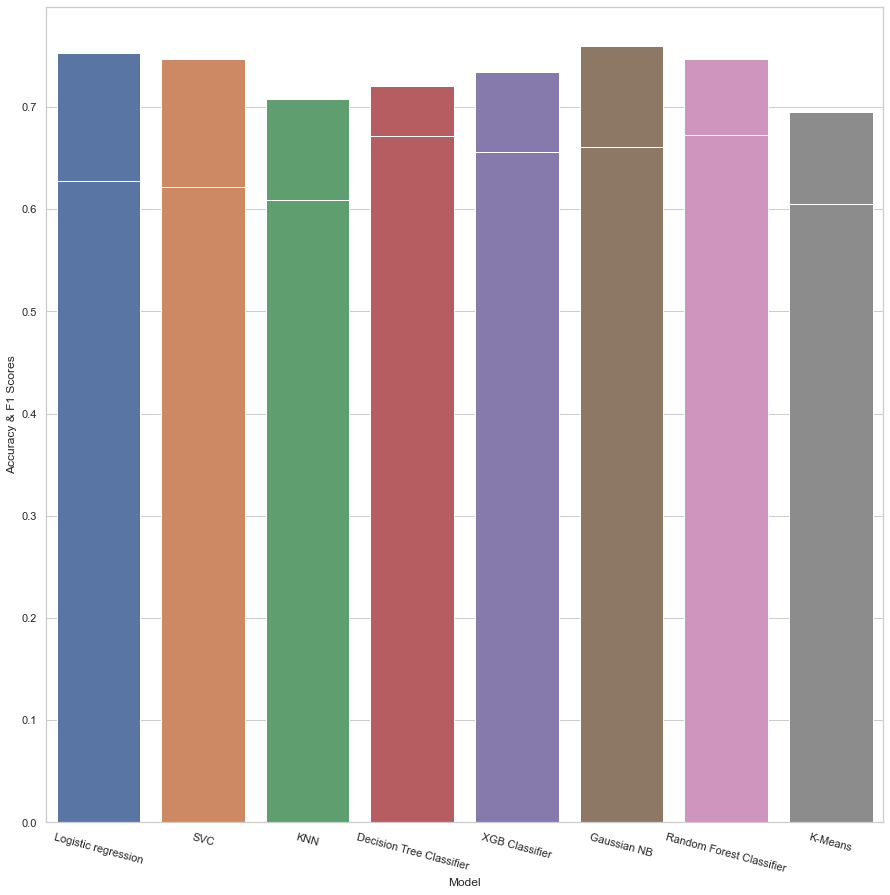

In [30]:
colors = ["red", "dark blue", "pink", "gold", "green", "orange", "magenta", "blue", "black"]
sns.set(rc={'figure.figsize': (15, 15)})
sns.set_style("whitegrid")
sns.barplot(x=models['Model'], y=models['Accuracy Score'])
sns.barplot(x=models['Model'], y=models['F1 Score'])
plt.xticks(rotation=-15) # Set the x-axis label rotation angle
plt.ylabel("Accuracy & F1 Scores")
plt.show()

# There are eight different models were considered and evaluated to find the best one to predict the disease. 
# Random Forest with an accuracy rate of 75 % and F1 score value 67% has the best performance on the chosen dataset,
# as well as Gaussian NB model, which has accuracy 76% and F1 score 66% respectively. The results of the model evaluation
# show that the effectiveness of various classification techniques on a dataset depends on the nature and complexity of
# the dataset used. 

# Taking into account all metrics values The Random Forest is considered as the most suitable and accurate model.
